# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 6 Multilayer Perceptron ##
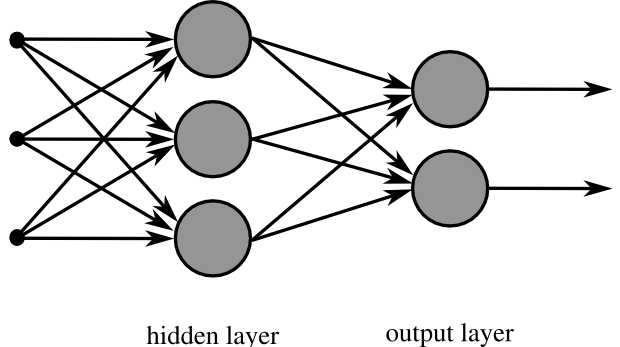

## Please run the following cells and do not modify anything.

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import os

def let_me_see(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    os.makedirs("models", exist_ok=True) # create a new folder "models" to save your model

# Prepare Dataset

Some convention of notation:

N: number of samples

h: height of image

w: width of image

In [ ]:
# Load the MNIST dataset and split it into training and testing sets
if __name__ == "__main__":
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    # x_train: (N, h, w) = (60000, 28, 28)
    # y_train: (N,) = (60000,)
    # x_test: (N, h, w) = (10000, 28, 28)
    # y_test: (N,) = (10000,)

4422102/4422102 [==============================] - 0s 0us/step


# Task 1 Pre-process the data

### TODO 1.1
Normalize the image data "x"

Original image data is in range [0, 255], normalize it to [0, 1]

Function name: process_x

Input:
- "X": a 3D Numpy array with shape (N, h, w), which contains all the images

Output:
- "X_normalized": a 3D Numpy array with shape (N, h, w), which contains all the images, normalized

### TODO 1.2
Convert the labels "y" to one-hot encoded vectors

Original labels are integers from 0 to 9. One-hot encoding converts them to vectors of 0s and 1s, where the index of the 1 is the same as the original label.

Function name: process_y

Input:
- "y": a 1D Numpy array of shape (N, ), which contains the original labels

Output:
- "y_onehot": a 2D Numpy array of shape (N, 10), which contains the one-hot encoded labels

### Code Cell of Task 1

In [ ]:
def process_x(x):
    # TODO 1.1
    # Normalize x to be in range [0, 1]
    x_normalized = # <Add your code here>
    return x_normalized

def process_y(y):
    # TODO 1.2
    # Convert y to one-hot vector
    # Hint: You may consider using
        # keras.utils.to_categorical: https://keras.io/utils/#to_categorical-function
    y_onehot = # <Add your code here>
    return y_onehot

In [ ]:
if __name__ == "__main__":
    # Perform data normalization
    x_train = process_x(x_train)
    x_test = process_x(x_test)
    # x_train: (N, h, w) = (60000, 28, 28)
    # x_test: (N, h, w) = (10000, 28, 28)

    # Convert the labels to one-hot encoded vectors
    y_train = process_y(y_train)
    y_test = process_y(y_test)
    # y_train: (N, 10) = (60000, 10)
    # y_test: (N, 10) = (10000, 10)

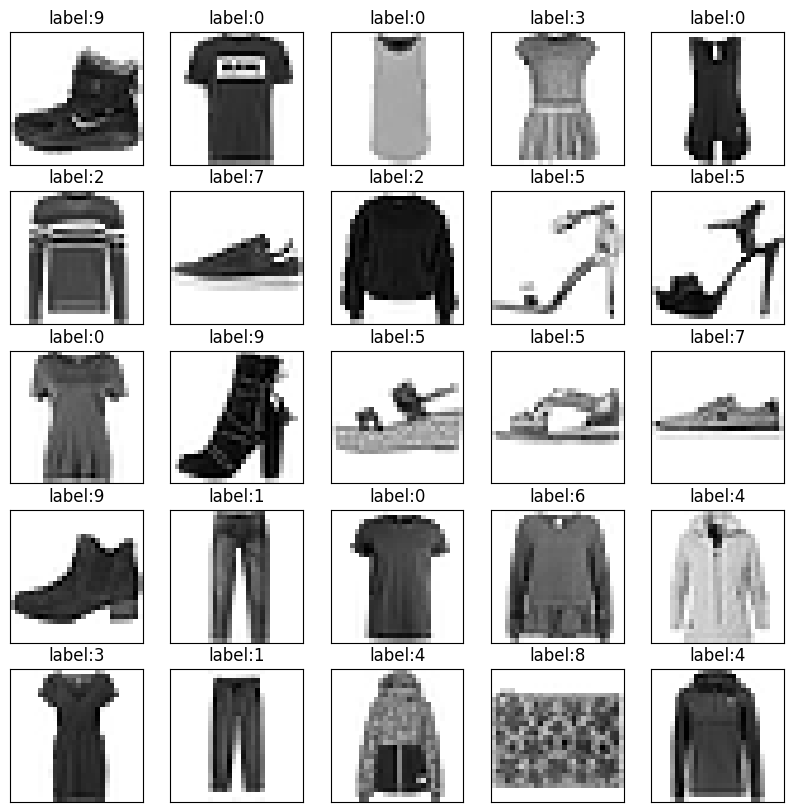

In [ ]:
# visualize the picture in x_train
if __name__ == "__main__":
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.title(f"label:{np.argwhere(y_train[i] == 1)[0][0]}")


# Task 2 MLP Model

After preprocessing the data, we need to build a model to fit it.
We firstly build a simple model with only 1 dense layers as the baseline model. You can check the performance of the baseline model later.

In [ ]:
def BaselineModel(img_shape):
    # Create a sequential model
    model = Sequential()

    # Flatten the input image
    model.add(Flatten(input_shape=img_shape))

    # Add the output layer with 10 units (one for each class) and softmax activation
    model.add(Dense(10, activation='softmax'))

    return model

### TODO 2.1
Build your own model following the description

In [ ]:
def myModel(img_shape):
    # Create a sequential model
    model = Sequential()

    # TODO 2.1
    # Build your own model with model.add() and Dense layers
    # Hint: you may consider using
        # Flatten(): https://keras.io/api/layers/reshaping_layers/flatten/
        # Dense(): https://keras.io/api/layers/core_layers/dense/
        # Dropout(): https://keras.io/api/layers/regularization_layers/dropout/
        # BatchNormalization(): https://keras.io/api/layers/normalization_layers/batch_normalization/

    # Flatten the input image
    model.add(Flatten(input_shape=img_shape))

    # Add a dense layer with 256 units and ReLU activation
    # <Add your code here>
    model.add(Dropout(0.2))

    # Add another dense layer with 128 units and Tanh activation
    # <Add your code here>
    model.add(Dropout(0.2))

    # Add another dense layer with 128 units and ReLU activation
    # <Add your code here>
    model.add(Dropout(0.2))

    # Add the output layer with 10 units (one for each class) and Softmax activation
    # <Add your code here>

    return model

### Train the Baseline Model

In [ ]:
if __name__ == "__main__":
    # Create the model
    baseline = BaselineModel(img_shape=(28, 28))

    # Compile the model
    baseline.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    baseline_history = baseline.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6841 - accuracy: 0.7738 - val_loss: 0.5259 - val_accuracy: 0.8244
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4960 - accuracy: 0.8341 - val_loss: 0.4787 - val_accuracy: 0.8387
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4610 - accuracy: 0.8434 - val_loss: 0.4605 - val_accuracy: 0.8412
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4406 - accuracy: 0.8486 - val_loss: 0.4519 - val_accuracy: 0.8452
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4277 - accuracy: 0.8533 - val_loss: 0.4353 - val_accuracy: 0.8520
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4198 - accuracy: 0.8557 - val_loss: 0.4299 - val_accuracy: 0.8515
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4125 - accuracy: 0.8579 - val_loss: 0.4299 - val_accuracy: 0.8497
Epoch 

### Evaluate the Baseline Model

In [ ]:
if __name__ == "__main__":
    # Evaluate the model on the test data
    test_loss, test_accuracy = baseline.evaluate(x_test, y_test, verbose=1)
    print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.8400
Test accuracy: 0.8399999737739563


### Visualize the Baseline Model history

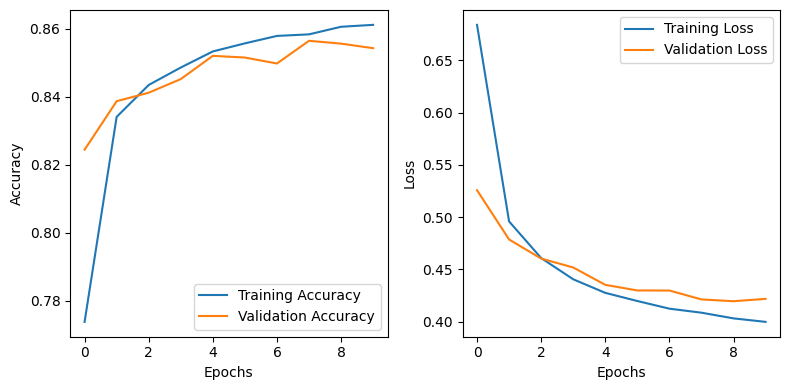

In [ ]:
if __name__ == "__main__":
    let_me_see(baseline_history)

### Train your own model

In [ ]:
if __name__ == "__main__":
    # Create the model
    model = myModel(img_shape=(28, 28))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Create a callback that saves the model's weights
    checkpointer = keras.callbacks.ModelCheckpoint(
        filepath=os.path.join("models", "weights.hdf5"),
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True)

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[checkpointer])

Epoch 1/10
741/750 [============================>.] - ETA: 0s - loss: 0.6033 - accuracy: 0.7834
Epoch 1: val_accuracy improved from -inf to 0.85075, saving model to models/weights.hdf5
750/750 [==============================] - 6s 7ms/step - loss: 0.6021 - accuracy: 0.7839 - val_loss: 0.4151 - val_accuracy: 0.8508
Epoch 2/10
 14/750 [..............................] - ETA: 6s - loss: 0.4903 - accuracy: 0.8181

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


740/750 [============================>.] - ETA: 0s - loss: 0.4305 - accuracy: 0.8446
Epoch 2: val_accuracy improved from 0.85075 to 0.86550, saving model to models/weights.hdf5
750/750 [==============================] - 5s 6ms/step - loss: 0.4297 - accuracy: 0.8447 - val_loss: 0.3742 - val_accuracy: 0.8655
Epoch 3/10
743/750 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8575
Epoch 3: val_accuracy improved from 0.86550 to 0.87192, saving model to models/weights.hdf5
750/750 [==============================] - 4s 5ms/step - loss: 0.3904 - accuracy: 0.8575 - val_loss: 0.3490 - val_accuracy: 0.8719
Epoch 4/10
748/750 [============================>.] - ETA: 0s - loss: 0.3674 - accuracy: 0.8665
Epoch 4: val_accuracy did not improve from 0.87192
750/750 [==============================] - 5s 6ms/step - loss: 0.3675 - accuracy: 0.8665 - val_loss: 0.3618 - val_accuracy: 0.8663
Epoch 5/10
746/750 [============================>.] - ETA: 0s - loss: 0.3495 - accuracy: 0.8719

### Evaluate your own model

In [ ]:
if __name__ == "__main__":
    # load the best model
    model = keras.models.load_model(os.path.join('models', 'weights.hdf5'))
    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8776
Test accuracy: 0.8776000142097473


**NOTE**: If your model's test accuracy does not surpass that of the baseline, say 85%, you may want to train with more epochs by setting `epochs=n` where n > 10.

### Visualize your own model history

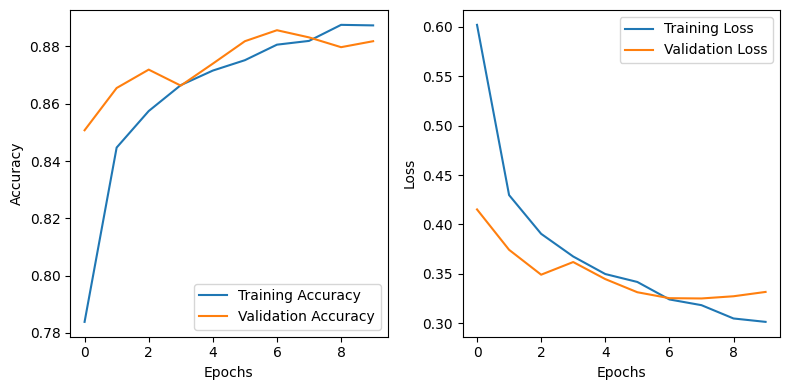

In [ ]:
if __name__ == "__main__":
    let_me_see(history)

The End.